<a href="https://colab.research.google.com/github/ishan-chowdhury/Machine-Learning-CSE11/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a dataset for regression

In [79]:
from sklearn.datasets import make_regression
X , y = make_regression(n_samples = 500, n_features = 2 , noise = 0 , random_state = 42)


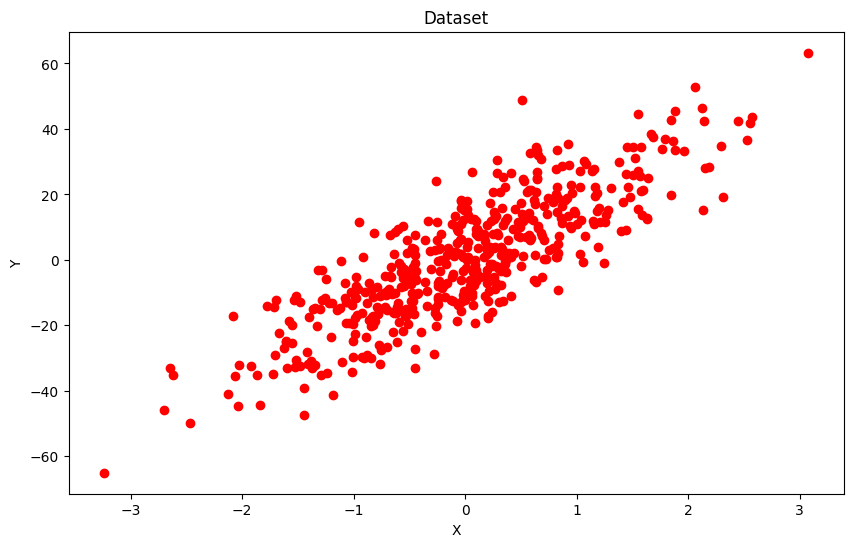

In [80]:
#Plotting this dataset#

plt.figure(figsize = (10 ,6))
plt.scatter(X[:, 0] , y , marker = 'o' , color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset')
plt.show()

In [81]:
from sklearn.model_selection import train_test_split

X_train , X_test,  y_train , y_test = train_test_split(X , y, test_size = 0.2 , random_state = 42)

# Making a Custom Linear Regressor

In [82]:
class LinearRegressor():
  def __init__(self):
    self.coef_  = 0.0
    self.intercept = 0.0

  def fit(self,  X_train , y_train):
    #Using the least square method#
    #Bias = ymean - b * xmean#
    num = 0
    den = 0
    for i in range(len(X_train[0])):
      num = X_train[i] - np.mean(X_train) * y_train[i] - np.mean(y_train)
      den = X_train[i]  - np.mean(X_train) ** 2
      self.coef_ = self.coef_  + num/den
      self.intercept  = self.intercept + np.mean(y_train) - self.coef_ * np.mean(X_train)

      print(self.coef_ , self.intercept)

    if isinstance(self.intercept, np.ndarray) and self.intercept.ndim > 0:
        self.intercept = np.mean(self.intercept)

  def predict(self , X_test):
    return X_test @ self.coef_ + self.intercept

# Train the Model

In [83]:
model = LinearRegressor()

model.fit(X_train , y_train)

y_pred = model.predict(X_test)

print(y_pred)

[-0.88757505  0.15207029] [0.24949769 0.23620562]
[12.32419071  0.87114929] [0.33008039 0.46321768]
[-6.93347181e+00  3.65325247e+00  1.27340434e+01 -1.42786828e+01
  7.40969925e-01  9.88408918e+00  3.93166802e+01 -5.98952582e+00
  1.94081083e+01 -6.12666437e+00  4.40807886e+00  1.56274879e+01
  1.01381616e+01  1.45611824e+01 -3.82769415e+00 -7.59541215e+00
  2.00153150e-02  4.19294827e+00  1.18191531e+01  3.18639366e+01
 -1.50964971e+01  1.93534763e+00  2.71212393e+00 -1.20090446e+01
 -7.82685920e+00 -1.55711512e+01  4.59759238e+00 -1.03622611e+01
 -1.31068553e+01  1.95860397e+01  1.71188549e+00 -9.52426399e+00
  8.69217265e+00 -1.02470497e+01 -2.01225013e+00 -1.23042394e+01
  9.26627897e-01 -5.64132046e+00 -5.51373930e+00  1.94995672e+00
 -2.03942899e-01  5.45286311e-01 -1.96196052e+01 -6.05353231e+00
  1.65039163e+01  4.46282868e+00 -1.05822241e+01 -1.02153979e+01
  8.53087885e+00 -1.12970897e+01  1.02638625e+01  2.43688566e+00
 -3.07585839e+01 -2.06445513e+01  2.41263471e-01 -1.054

# Getting the performance score

In [84]:
from sklearn.metrics import r2_score

r2_score(y_test , y_pred)

0.7075891257900528

# Using Sklearn

In [86]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train , y_train)

y_pred = model.predict(X_test)

print(y_pred)

[-17.17859893  -3.24520154   7.24741299  -2.96043789  -5.81133946
   4.95479499  63.27304388 -12.68972251  20.9876478   -0.9867275
  14.56383949  15.21272735  18.89837632  30.0920146    7.73633633
 -10.42148179   5.24360379  -1.26621844   1.74741481  41.8724793
 -14.84497083   3.48478722   1.80802907  -7.09322215  -4.87368434
 -14.80760547   2.06157677 -13.19560234 -14.8048622   21.3374291
 -15.95431171 -11.22257496  -9.23026555  -9.90298837 -12.13427688
 -22.51141121   3.9433231   -3.66751677  -7.27285384  -9.44072406
 -19.24674571  13.55607812 -26.75568712  -1.76095227  22.08412881
  13.77530391 -31.65652378 -17.28879882   8.17713199 -11.60644411
  32.04974426  11.75479134 -49.72870191 -29.10953924   0.87680182
 -18.4316395   -7.87641316 -11.23848881  -3.41962563 -31.03765816
 -13.67714065  32.73395556  44.6971217  -10.80172141  -2.94243507
 -12.63147464  17.51067244  20.76151996 -15.9908947    5.61796331
  27.67458578  14.24805058  25.93665697   7.50365223 -10.19179441
  20.6718306 

In [87]:
r2_score(y_test , y_pred)


1.0

In [88]:
#Means the custom regressor may have some problems if r2 score can explain variance perfectly but custom regressor can only explain 70% of the variance#